## 리지 회귀
- 리지 회귀에서의 가중치(w) 선택은 훈련 데이터를 잘 예측하기 위해서 뿐만 아니라 추가 제약 조건을 만족시키기 위한 목적도 있음 -> 가중치의 절댓값을 가능한 한 작게 
- 모든 특성이 출력에 주는 영향을 최소한으로 만듦 (기울기를 작게 만듦) -> 이런 제약을 규제라고 함
- 규제: 과대적합이 되지 않도록 모델을 강제로 제한한다는 의미
- 리지 회귀에 사용하는 규제 방식을 L2 규제라고 함

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import mglearn

In [2]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

lr = LinearRegression().fit(X_train, y_train) 
ridge = Ridge().fit(X_train, y_train)
print('LinearRegression 훈련 세트 점수: {:.2f}'.format(lr.score(X_train, y_train)))
print('LinearRegression 테스트 세트 점수: {:.2f}'.format(lr.score(X_test, y_test)))
print('Ridge 훈련 세트 점수: {:.2f}'.format(ridge.score(X_train, y_train)))
print('Ridge 테스트 세트 점수: {:.2f}'.format(ridge.score(X_test, y_test)))

LinearRegression 훈련 세트 점수: 0.95
LinearRegression 테스트 세트 점수: 0.61
Ridge 훈련 세트 점수: 0.89
Ridge 테스트 세트 점수: 0.75


### Ridge:
- 훈련 세트에서의 점수는 LinearRegression보다 낮지만 테스트 세트에 대한 점수는 더 높음
- 선형 회귀는 이 데이터셋에 과대적합되지만 Ridge는 덜 자유로운 모델이기 때문에 과대적합이 적어짐
- 모델의 복잡도가 낮아지면 훈련 세트에서 성능은 나빠지지만 더 일반화된 모델이 됨
- Ridge는 모델을 단순하게 (계수를 0에 가깝게) 해주고 훈련 세트에 대한 성능 사이를 절충할 수 있는 방법을 제공
- 사용자는 alpha 매개변수로 훈련 세트의 성능 대비 모델을 얼마나 단순화할지를 지정할 수 있음
- 최적의 alpha 값은 사용하는 데이터셋에 달림 -> alpha 값을 높이면 계수를 0에 더 가깝게 만들어서 훈련 세트의 성능은 나빠지지만 일반화에는 도움을 줄 수 있음

In [4]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print('훈련 세트 점수: {:.2f}'.format(ridge10.score(X_train, y_train)))
print('테스트 세트 점수: {:.2f}'.format(ridge10.score(X_test, y_test)))

훈련 세트 점수: 0.79
테스트 세트 점수: 0.64


- alpha 값을 줄이면 계수에 대한 제약이 풀림
- 아주 작은 alpha 값은 계수를 거의 제한하지 않으므로 LinearRegression으로 만든 모델과 거의 같아짐

In [5]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print('훈련 세트 점수: {:.2f}'.format(ridge01.score(X_train, y_train)))
print('테스트 세트 점수: {:.2f}'.format(ridge01.score(X_test, y_test)))

훈련 세트 점수: 0.93
테스트 세트 점수: 0.77


-> 테스트 세트에 대한 성능이 높아질 때까지 alpha 값을 줄일 수 있을 것

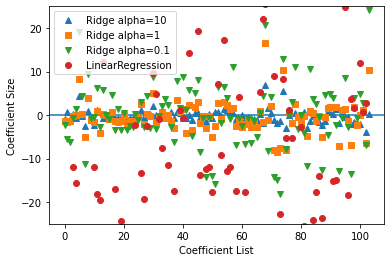

In [6]:
plt.plot(ridge10.coef_, '^', label='Ridge alpha=10')
plt.plot(ridge.coef_, 's', label='Ridge alpha=1')
plt.plot(ridge01.coef_, 'v', label='Ridge alpha=0.1')

plt.plot(lr.coef_, 'o', label='LinearRegression')
plt.xlabel('Coefficient List')
plt.ylabel('Coefficient Size')
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend();

- x 축은 coef_의 원소를 위치대로 나열한 것 -> x=0은 첫 번째 특성은 연관된 계수이고 x=1은 두 번째 특성에 연관된 계수 -> 이런 식으로 x=100가지 지속
- y 축은 각 계수의 수치를 나타냄
- alpha=10일 때 대부분의 계수는 -3과 3 사이에 위치
- alpha=1, alpha=0.1일 때 모델의 계수는 점점 더 커짐
- 아무런 규제가 없는 (alpha=0) 선형 회귀의 계수는 값이 더 커져 그림 밖으로 넘어감

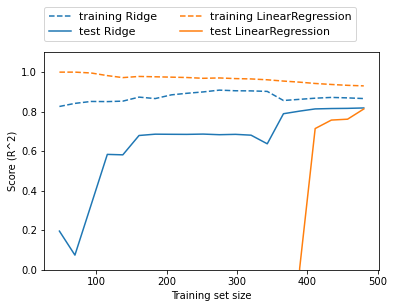

In [7]:
mglearn.plots.plot_ridge_n_samples()

- 모든 데이터셋에 대해 리지와 선형 회귀 모두 훈련 세트의 점수가 테스트 세트의 점수보다 높음
- 리지에는 규제가 적용되므로 리지의 훈련 데이터 점수가 전체적으로 선형 회귀의 훈련 데이터 점수보다 낮음
- 테스트 데이터에서는 리지의 점수가 더 높으며 특별히 작은 데이터셋에서는 더 높음
- 데이터셋 크기가 400 미만에서는 선형 회귀는 어떤 것도 학습하지 못하고 있음
- 두 모델의 성능은 데이터가 많아질수록 좋아지고 마지막에는 선형 회귀가 리지 회귀를 따라잡음
- 데이터를 충분히 주면 규제 항은 덜 중요해져서 리지 회귀와 선형 회귀의 성능이 같아질 것
- 선형 회귀의 훈련 데이터 성능이 감소 -> 데이터가 많아질수록 모델이 데이터를 기억하거나 과대적합이 어려워지기 때문